In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Load the dataset
df = pd.read_csv("/content/data.csv")

In [12]:
# Step 1: Data Preprocessing
df.drop(columns=['Roll'], inplace=True)  # Drop unused column
df.drop_duplicates(inplace=True)         # Remove duplicate rows
df.dropna(inplace=True)                  # Remove rows with null values

In [13]:
# Step 2: Calculate Cumulative GPA
semester_cols = ['1st', '2nd', '3rd', '4th', '5th']
df["CGPA"] = df[semester_cols].mean(axis=1).round(2)

In [14]:
# Step 3: Display cleaned dataset
print("Cleaned Data (First 5 Rows):")
print(df.head())

Cleaned Data (First 5 Rows):
    1st   2nd   3rd   4th   5th  College Code  Gender  Roll no.  Subject Code  \
0  8.11  7.68  7.11  7.43  8.18           115  Female   17020.0            16   
1  6.48  5.90  4.15  4.29  4.96           115    Male   17021.0            16   
2  8.41  8.24  7.52  8.25  7.75           115  Female   17022.0            16   
3  7.33  6.83  6.33  6.79  6.89           115    Male   17023.0            16   
4  7.89  7.34  7.22  7.32  7.46           115    Male   17024.0            16   

   CGPA  
0  7.70  
1  5.16  
2  8.03  
3  6.83  
4  7.45  


In [15]:
# Step 4: Basic Summary Stats
print("\nSummary Statistics:")
print(df[semester_cols + ['CGPA']].describe())


Summary Statistics:
             1st        2nd        3rd        4th        5th       CGPA
count  46.000000  46.000000  46.000000  46.000000  46.000000  46.000000
mean    7.397609   6.930217   6.703043   7.237826   7.527609   7.159565
std     0.798391   0.910425   0.917324   1.057981   0.967963   0.856102
min     5.670000   4.280000   4.150000   4.290000   4.860000   5.120000
25%     6.787500   6.350000   6.217500   6.650000   6.890000   6.567500
50%     7.440000   6.810000   7.000000   7.290000   7.625000   7.265000
75%     8.040000   7.590000   7.322500   7.890000   8.210000   7.817500
max     8.890000   8.720000   8.370000   9.250000   9.000000   8.560000


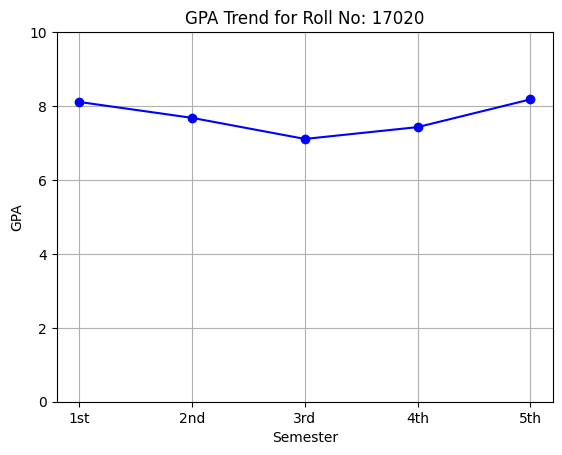

In [16]:
# Step 5: Plot GPA Trend for a Sample Student
sample_student = df.iloc[0]
plt.plot(semester_cols, sample_student[semester_cols], marker='o', color='blue')
plt.title(f"GPA Trend for Roll No: {int(sample_student['Roll no.'])}")
plt.xlabel("Semester")
plt.ylabel("GPA")
plt.ylim(0, 10)
plt.grid(True)
plt.show()

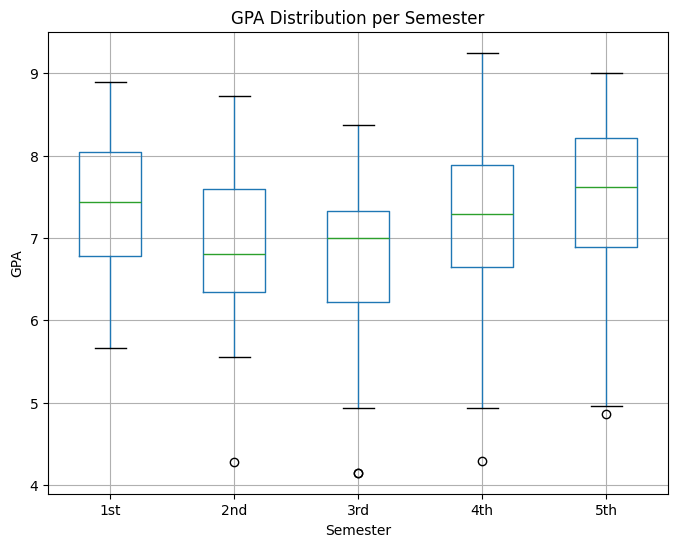

In [17]:
#box plot
plt.figure(figsize=(8, 6))
df[semester_cols].boxplot()
plt.title("GPA Distribution per Semester")
plt.xlabel("Semester")
plt.ylabel("GPA")
plt.grid(True)
plt.show()

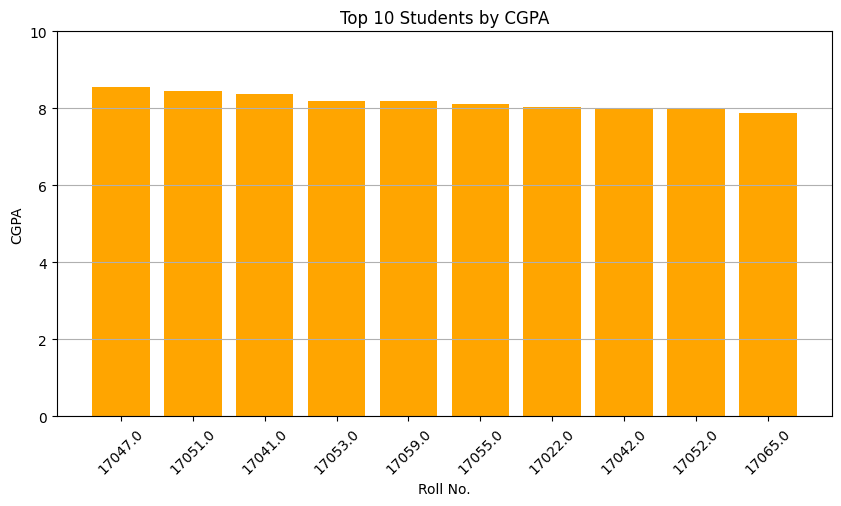

In [18]:
# Top 10 Students by CGPA
top_students = df.sort_values(by="CGPA", ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.bar(top_students["Roll no."].astype(str), top_students["CGPA"], color='orange')
plt.title("Top 10 Students by CGPA")
plt.xlabel("Roll No.")
plt.ylabel("CGPA")
plt.xticks(rotation=45)
plt.ylim(0, 10)
plt.grid(axis='y')
plt.show()

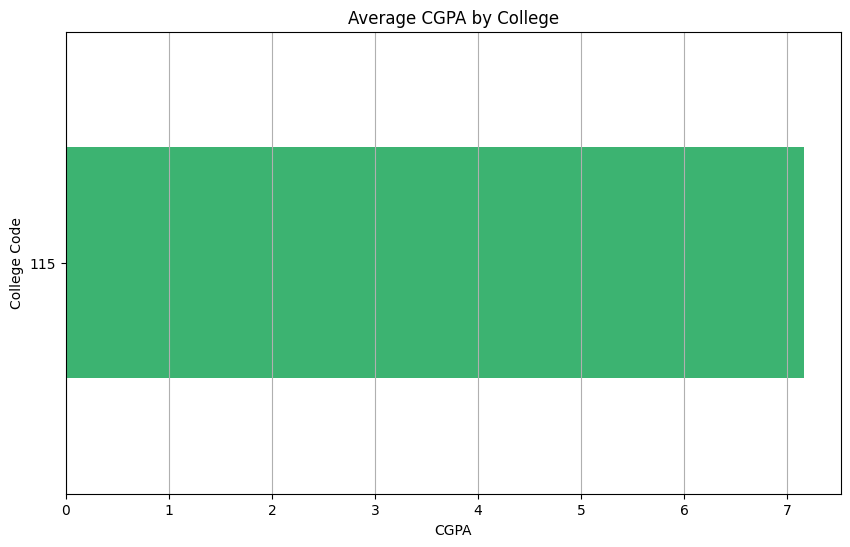

In [20]:
#College-wise Average CGPA
college_avg = df.groupby("College Code")["CGPA"].mean().sort_values()

plt.figure(figsize=(10, 6))
college_avg.plot(kind='barh', color='mediumseagreen')
plt.title("Average CGPA by College")
plt.xlabel("CGPA")
plt.ylabel("College Code")
plt.grid(axis='x')
plt.show()

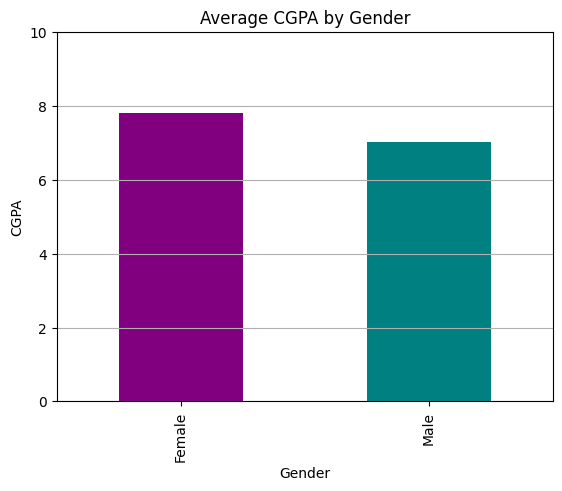

In [21]:
# Step 6: Gender-wise CGPA Comparison
gender_avg = df.groupby("Gender")["CGPA"].mean()

gender_avg.plot(kind='bar', color=['purple', 'teal'])
plt.title("Average CGPA by Gender")
plt.ylabel("CGPA")
plt.xlabel("Gender")
plt.ylim(0, 10)
plt.grid(axis='y')
plt.show()

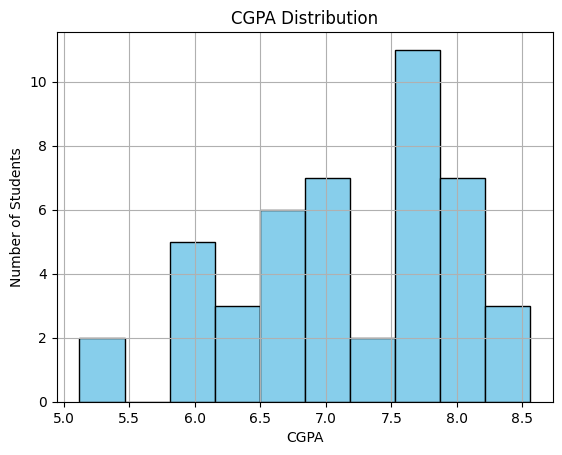

In [22]:
# Step 7: Histogram of CGPA Distribution
plt.hist(df["CGPA"], bins=10, color='skyblue', edgecolor='black')
plt.title("CGPA Distribution")
plt.xlabel("CGPA")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()

In [24]:
# Assign Pass/Fail (CGPA >= 5)
df['Status'] = np.where(df['CGPA'] >= 5, 'Pass', 'Fail')
print(df['Status'].value_counts())

Status
Pass    46
Name: count, dtype: int64


In [25]:
# Show summary
print("\nSummary:")
print("Total students:", len(df))
print("Passed:", (df['Status'] == 'Pass').sum())
print("Failed:", (df['Status'] == 'Fail').sum())
print("Average CGPA:", df['CGPA'].mean().round(2))


Summary:
Total students: 46
Passed: 46
Failed: 0
Average CGPA: 7.16


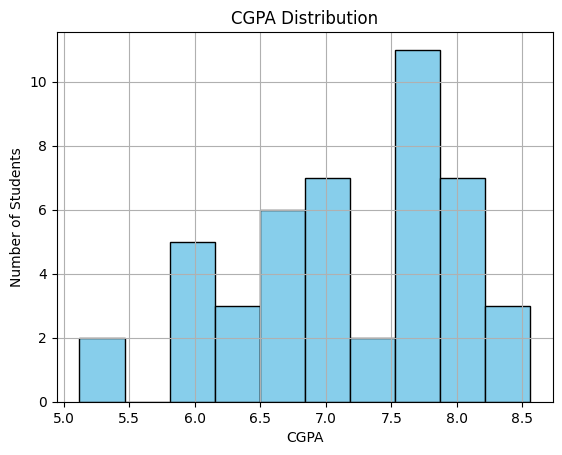

In [27]:
# CGPA distribution plot
plt.hist(df['CGPA'], bins=10, color='skyblue', edgecolor='black')
plt.title("CGPA Distribution")
plt.xlabel("CGPA")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()

In [28]:
# Save final result to CSV
df.to_csv("/content/data.csv", index=False)